In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt

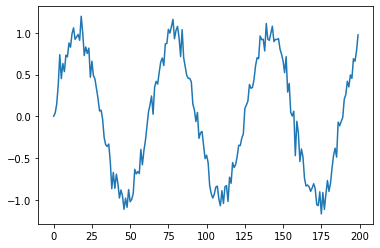

In [2]:
#making the original Data
series = np.sin(0.1* np.arange(200)) + np.random.randn(200)*0.1

#Ploting the data
plt.plot(series)
plt.show()

In [3]:
T = 10
D = 1
X = []
Y = []

for t in range(len(series) -  T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) #Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X Shape: ", X.shape, "Y Shape: ", Y.shape)

X Shape:  (190, 10, 1) Y Shape:  (190,)


In [7]:
# AutoRegressive RNN Model
i = Input(shape=(T, 1))
x = SimpleRNN(5, activation='relu')(i)
x = Dense(1)(x)

model = Model(i, x)

model.compile(loss='mse', optimizer=Adam(learning_rate=0.1))
r = model.fit( X[:N//2], Y[:N//2], epochs = 80, validation_data=(X[-N//2:], Y[-N//2:]),)

Epoch 1/80
3/3 [==============================] - 0s 59ms/step - loss: 0.1773 - val_loss: 0.0878
Epoch 2/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0573 - val_loss: 0.0436
Epoch 3/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0540 - val_loss: 0.0503
Epoch 4/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0342 - val_loss: 0.0377
Epoch 5/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0393 - val_loss: 0.0467
Epoch 6/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0323 - val_loss: 0.0362
Epoch 7/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0341 - val_loss: 0.0417
Epoch 8/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0325 - val_loss: 0.0378
Epoch 9/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0292 - val_loss: 0.0342
Epoch 10/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0343 - val_loss: 0.0347
Epoch 11/80
3/3 [=====================

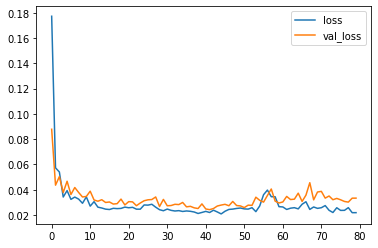

In [8]:
#Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [10]:
#Wrong forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

#Index of First validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1, 1))[0,0]
  i += 1

  #Update the predictions list
  validation_predictions.append(p)

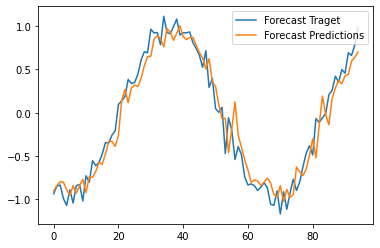

In [11]:
plt.plot(validation_target, label='Forecast Traget')
plt.plot(validation_predictions, label='Forecast Predictions')
plt.legend()

In [12]:
#Forecast Future values (use only self predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0]

  #Update the predictions list
  validation_predictions.append(p)

  #make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

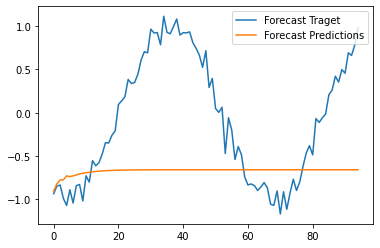

In [13]:
plt.plot(validation_target, label='Forecast Traget')
plt.plot(validation_predictions, label='Forecast Predictions')
plt.legend()